In [23]:
import seaborn as sns
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # visualization library

test = pd.read_csv("/kaggle/input/titanic/test.csv", index_col='PassengerId')
train = pd.read_csv("/kaggle/input/titanic/train.csv", index_col='PassengerId')

# Check for missing values
train.isnull().sum(axis=0)  # The presence of null values is indicated as True/False


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [24]:
test.isnull().sum(axis=0)



Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [25]:


train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
train.corr()

/tmp/ipykernel_32/2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [27]:
pt1 = train.pivot_table(values='Age',
                 index=['Pclass','Sex'],
                 aggfunc='mean')

pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [28]:
def fill_age(row):
    # If the age in 'row' is missing (NaN), retrieve the value from the pivot table.
    # If the age is not missing, return the original value in the 'Age' column.
    if np.isnan(row['Age']):
        pclass = row['Pclass']
        sex = row['Sex']
        return pt1.loc[pclass, sex]
    else:
        return row['Age']
        
# Apply the custom function 'fill_age' to the 'train' DataFrame along axis 1 (i.e., row-wise).
# The 'Age' column in the 'train' DataFrame will be filled with values returned by the 'fill_age' function.
# The 'Age' values will be converted to integers (int64 data type).
train['Age'] = train.apply(fill_age, axis=1).astype('int64')

# The 'apply' function is used to apply a specific function to the entire DataFrame.
# It can be applied row-wise or column-wise.

# Check if there are any missing values (NaN) in the 'train' DataFrame after applying the custom function.
train.isnull().sum(axis=0)

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [29]:
test['Age']=test.apply(fill_age, axis=1).astype('int64')
test.isnull().sum(axis=0)

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [30]:
train['Embarked'].fillna('S', inplace=True)
# Fill missing values in the 'Embarked' column with 'S'.
# The 'fillna' function is used to fill missing values in a DataFrame or Series.
# The 'inplace' parameter controls whether the operation modifies the object directly or returns a new object.
# With 'inplace=True', the operation is applied directly to the DataFrame 'train', and the changes are made in place.

In [31]:
train.pivot_table(values='Fare',         # Display the 'Fare' values
                 index=['Pclass', 'Sex'],  # Use 'Pclass' and 'Sex' as index (rows)
                 aggfunc='mean')          # Calculate the mean for the pivot table

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [32]:
# Checking the location of NaN values in the 'Fare' column of the 'test' DataFrame
test['Fare'][test['Fare'].isnull()]

# Filling the NaN values in the 'Fare' column with the value 12.6616
test['Fare'].fillna(12.6616, inplace=True)

In [33]:
# Extract the first character of the 'Cabin' values and assign it back to the 'Cabin' column in the 'train' DataFrame.
train['Cabin'] = train['Cabin'].str[0]

# Get the unique values in the 'Cabin' column of the 'train' DataFrame, including the 'nan' value.
train['Cabin'].unique()

# Replace the 'nan' (missing) values in the 'Cabin' column of the 'train' DataFrame with 'M'.
# The 'Cabin' information will be treated as 'M' for missing values.
train['Cabin'].fillna('M', inplace=True)

# Display information about the 'train' DataFrame to check for any remaining missing values.
train.info()

# Similarly, perform the same process for the 'test' DataFrame.
test['Cabin'] = test['Cabin'].str[0] 
test['Cabin'].fillna('M', inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non

<Axes: xlabel='Cabin', ylabel='count'>

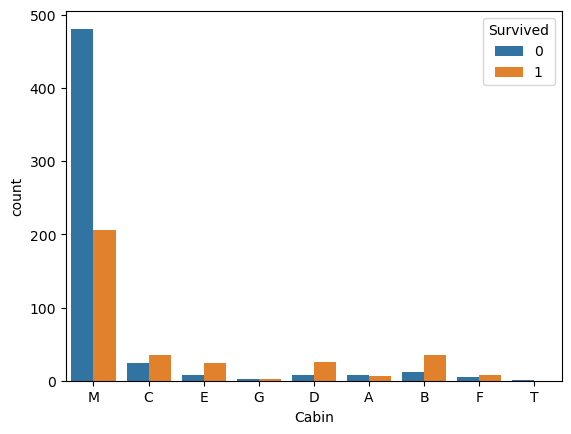

In [34]:
sns.countplot(data=train,
             x='Cabin',
             hue='Survived') # We will visualize the 'Cabin' data, splitting it by the 'Survived' attribute.

# The seaborn library allows us to directly visualize the data using the countplot function.

<Axes: xlabel='Pclass', ylabel='count'>

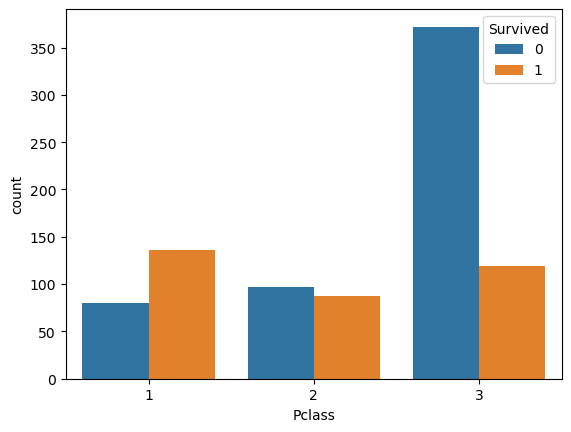

In [35]:
sns.countplot(data=train,
             x='Pclass',
             hue='Survived') # We will visualize the 'Cabin' data, splitting it by the 'Survived' attribute.

# The seaborn library allows us to directly visualize the data using the countplot function.

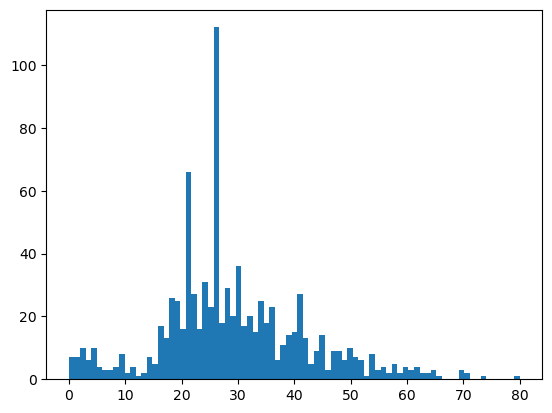

In [36]:
plt.hist(train['Age'], bins=81) 
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

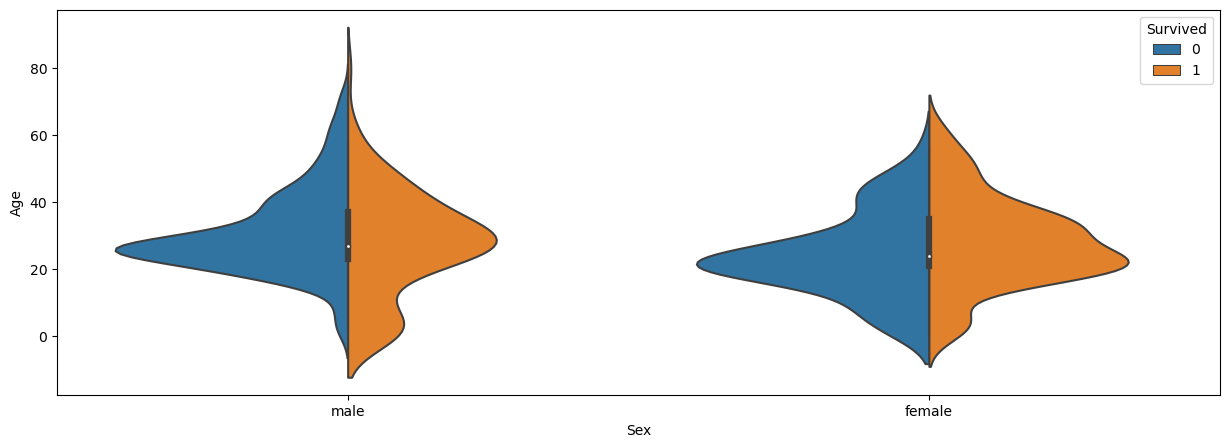

In [37]:
plt.figure(figsize=(15, 5))  # Adjusting the size of the graph

sns.violinplot(data=train,
               y='Age',      # Displaying the density of 'Age'
               x='Sex',      # Grouping by 'Sex'
               hue='Survived',
               split=True)   # Using symmetry to split and merge each violin plot, showing only one side of each.

<Axes: xlabel='Family_Size', ylabel='count'>

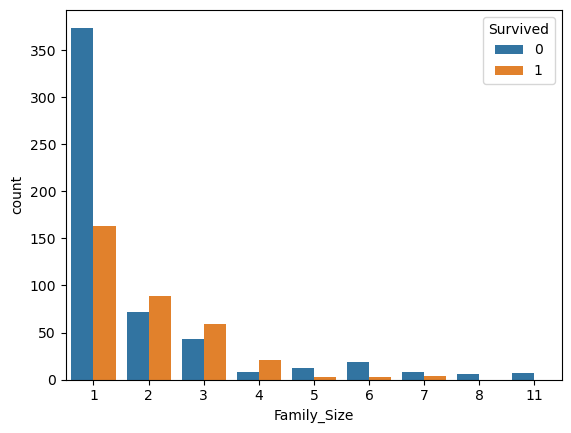

In [38]:
# SibSp + Parch
# Since Series is based on numpy, direct arithmetic operations are possible.
# Create a new column called 'Family_Size' and update it.
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
# Adding 1 to include the passenger themselves in the family size count.

# Create a countplot using the 'train' DataFrame.
# The 'x' axis represents the 'Family_Size' column, and the data will be split by the 'Survived' column.
sns.countplot(data=train, x='Family_Size', hue='Survived')

<Axes: xlabel='Family_Group', ylabel='count'>

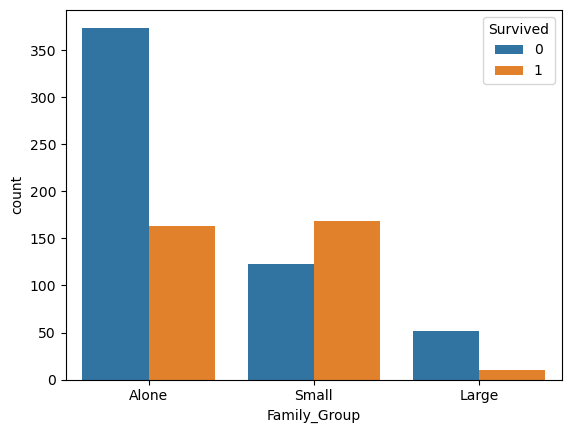

In [39]:
# Convert numerical data to categorical data using the 'cut' function.

# Add a new column called 'Family_Size' in the 'test' DataFrame by summing 'SibSp' (number of siblings/spouses aboard) and 'Parch' (number of parents/children aboard) columns and adding 1 for the passenger themselves.
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

# Define the bins for creating categories.
bins = [0, 1, 4, 20]  # The ranges for each category (exclusive to inclusive).

# Define the labels for each category.
labels = ['Alone', 'Small', 'Large']

# Create a new column 'Family_Group' in the 'train' DataFrame by using the 'cut' function to categorize 'Family_Size' based on the defined bins and labels.
train['Family_Group'] = pd.cut(x=train['Family_Size'], bins=bins, labels=labels)

# Similarly, apply the same process to the 'test' DataFrame to create the 'Family_Group' column.
test['Family_Group'] = pd.cut(x=test['Family_Size'], bins=bins, labels=labels)

# Data Visualization

# Create a countplot using the 'train' DataFrame.
# The 'x' axis represents the 'Family_Group' column, and the data will be split by the 'Survived' column.
sns.countplot(data=train, x='Family_Group', hue='Survived')

<Axes: xlabel='Title', ylabel='count'>

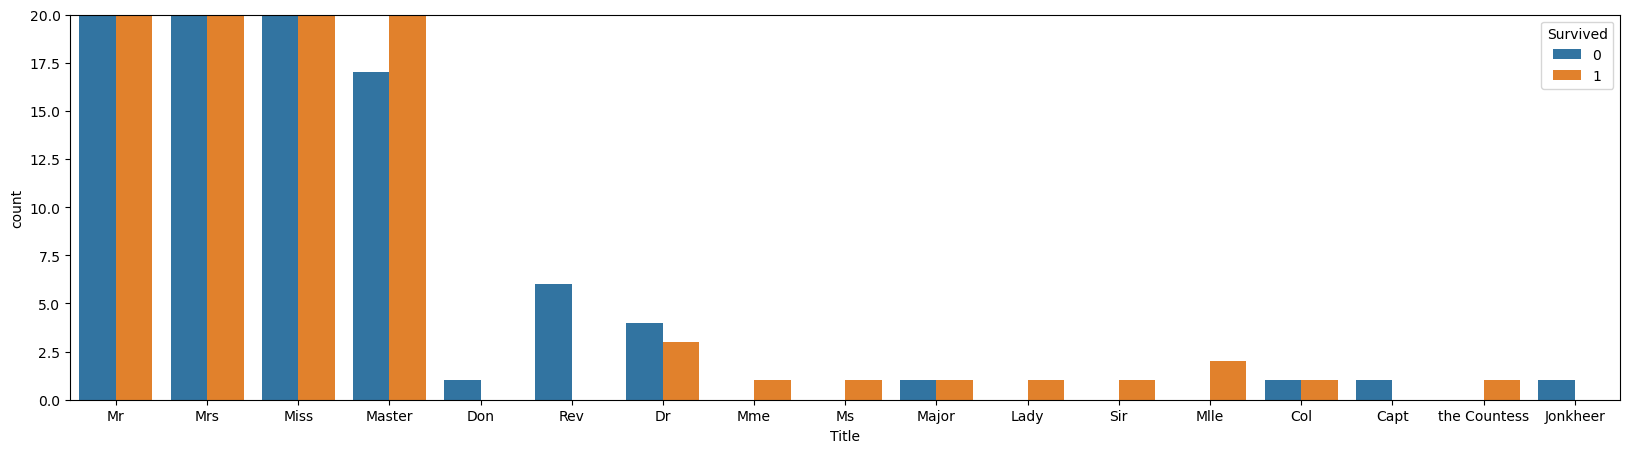

In [40]:
train['Name'][89].split(',')[1].split('.')[0].strip()
# strip: Function to remove leading and trailing whitespaces

# Define a custom function 'split_title(row)' that takes a 'row' as input and returns the extracted title from the 'Name' column.
def split_title(row):
    return row.split(',')[1].split('.')[0].strip()

# Applying the custom function using the 'apply' function to create a new 'Title' column in the 'train' DataFrame.
# This new column will contain the extracted titles for each passenger in the 'Name' column.
train['Title'] = train['Name'].apply(split_title)
train.head()

# Similarly, apply the same custom function to the 'test' DataFrame to create the 'Title' column.
test['Title'] = test['Name'].apply(split_title)
test.head()

# Data Visualization

# Set the size of the plot.
plt.figure(figsize=(20, 5))

# Set the y-axis limits.
plt.ylim(0, 20)

# Create a countplot using the 'train' DataFrame.
# The 'x' axis represents the 'Title' column, and the data will be split by the 'Survived' column.
sns.countplot(data=train, x='Title', hue='Survived')

In [41]:
# Mapping the titles to a unified set of titles using the 'title_dic' dictionary.

title_dic = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Mme': 'Miss',
    'Lady': 'Miss',
    'Don': 'Other',
    'Rev': 'Other',
    'Dr': 'Other',
    'Ms': 'Miss',
    'Major': 'Other',
    'Sir': 'Other',
    'Mlle': 'Other',
    'Col': 'Other',
    'Capt': 'Other',
    'the Countess': 'Other',
    'Jonkheer': 'Other',
    'Dona': 'Other'  # 'Dona' is only present in the test dataset, so it is added to the 'Other' category.
}

# Print unique values of 'Title' column in both train and test DataFrames before mapping.
print(train['Title'].unique())
print(test['Title'].unique())

# Map the 'Title' column in both train and test DataFrames using the 'title_dic' dictionary to create a new column 'Title2'.
train['Title2'] = train['Title'].map(title_dic)
test['Title2'] = test['Title'].map(title_dic)

# Print unique values of 'Title2' column in both train and test DataFrames after mapping.
print(train['Title2'].unique())
print(test['Title2'].unique())

# Drop the columns 'Name', 'Ticket', and 'Title' which are not going to be used in the analysis.
train.drop(['Name', 'Ticket', 'Title'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Title'], axis=1, inplace=True)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']


In [42]:
categorical_features = ['Sex', 'Cabin', 'Embarked', 'Family_Group', 'Title2']

# One-hot encoding the 'Title2' column in the 'train' DataFrame and checking the result.
pd.get_dummies(train['Title2'])

# Looping through the list of categorical_features and performing one-hot encoding on each feature.
# Adding a prefix to the one-hot encoded columns for easy identification.
for feature_name in categorical_features:
    one_hot = pd.get_dummies(train[feature_name], prefix=feature_name)  # One-hot encoding with a prefix.
    train.drop(feature_name, axis=1, inplace=True)  # Drop the original categorical column.
    train = pd.concat([train, one_hot], axis=1)  # Concatenate the one-hot encoded columns to the 'train' DataFrame.

# Similarly, one-hot encoding is performed on the 'test' DataFrame.
for feature_name in categorical_features:
    one_hot = pd.get_dummies(test[feature_name], prefix=feature_name)  # One-hot encoding with a prefix.
    test.drop(feature_name, axis=1, inplace=True)  # Drop the original categorical column.
    test = pd.concat([test, one_hot], axis=1)  # Concatenate the one-hot encoded columns to the 'test' DataFrame.

In [43]:
# Subtracting columns
set(train.columns) - set(test.columns)

# Execution result: {'Cabin_T', 'Survived'}

{'Cabin_T', 'Survived'}

In [44]:
# Add a new column 'Cabin_T' to the test data and set all values to 0.
test['Cabin_T'] = 0
test.head(1)

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other,Cabin_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,0,0,7.8292,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [45]:
# Model Selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

# Data Splitting for Training and Validation
X_train = train.drop(columns=['Survived'])
y_train = train['Survived']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=32)

# Model Training and Evaluation
knn_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

print("KNN Model Accuracy on Validation Set:", knn_model.score(X_val, y_val))
print("Decision Tree Model Accuracy on Validation Set:", tree_model.score(X_val, y_val))

# Cross-Validation for KNN Model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=17, shuffle=True, random_state=5)

knn_cv_results = cross_val_score(knn_model, X_train, y_train, cv=kf)
print("KNN Model Cross-Validation Mean Accuracy:", knn_cv_results.mean())

# Cross-Validation for Decision Tree Model
tree_cv_results = cross_val_score(tree_model, X_train, y_train, cv=kf)
print("Decision Tree Model Cross-Validation Mean Accuracy:", tree_cv_results.mean())

# Hyperparameter Tuning for KNN Model
knn_score_list = []
for k in range(1, 150, 2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_result = cross_val_score(knn_model, X_train, y_train, cv=kf)
    knn_score_list.append(knn_result.mean())

plt.figure(figsize=(35, 5))
plt.plot(range(1, 150, 2), knn_score_list)
plt.xticks(range(1, 150, 2))
plt.grid()
plt.show()

# Hyperparameter Tuning for Decision Tree Model
tree_score_list = []
for depth in range(1, 150, 2):
    tree_model = DecisionTreeClassifier(max_depth=depth)
    tree_result = cross_val_score(tree_model, X_train, y_train, cv=kf)
    tree_score_list.append(tree_result.mean())

plt.figure(figsize=(35, 5))
plt.plot(range(1, 150, 2), tree_score_list)
plt.xticks(range(1, 150, 2))
plt.grid()
plt.show()

# Final Model Training and Evaluation
final_knn = KNeighborsClassifier(n_neighbors=5)
final_tree = DecisionTreeClassifier(max_depth=5)

final_knn_result = cross_val_score(final_knn, X_train, y_train, cv=kf)
print("Final KNN Model Cross-Validation Mean Accuracy:", final_knn_result.mean())

final_tree_result = cross_val_score(final_tree, X_train, y_train, cv=kf)
print("Final Decision Tree Model Cross-Validation Mean Accuracy:", final_tree_result.mean())

final_knn.fit(X_train, y_train)
final_tree.fit(X_train, y_train)

print("Final KNN Model Accuracy on Validation Set:", final_knn.score(X_val, y_val))
print("Final Decision Tree Model Accuracy on Validation Set:", final_tree.score(X_val, y_val))

# Final Predictions
knn_pre = final_knn.predict(X_val)
tree_pre = final_tree.predict(X_val)

# Displaying the predictions
display(knn_pre)
display(tree_pre)

NameError: name 'train_test_split' is not defined